# Alucar - Analisando as Vendas

In [49]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_path = '../data/'

In [5]:
alucar = pd.read_csv(f'{data_path}alucar.csv')

In [6]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [7]:
alucar.shape

(24, 2)

In [8]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


In [9]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<Axes: xlabel='mes', ylabel='vendas'>

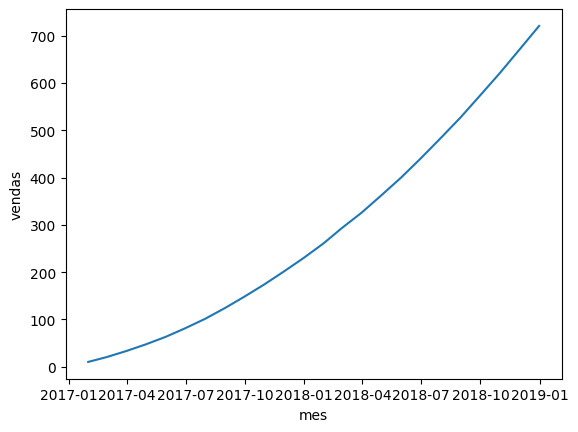

In [13]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [34]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette='dark', rc=custom_params)

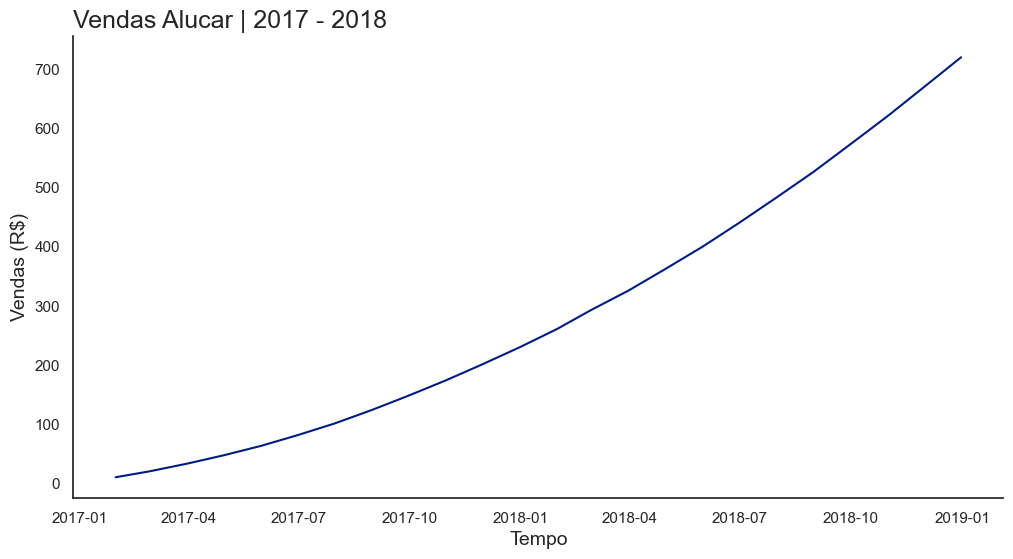

In [35]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar | 2017 - 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax=ax

In [36]:
alucar['aumento'] = alucar.vendas.diff()

In [37]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


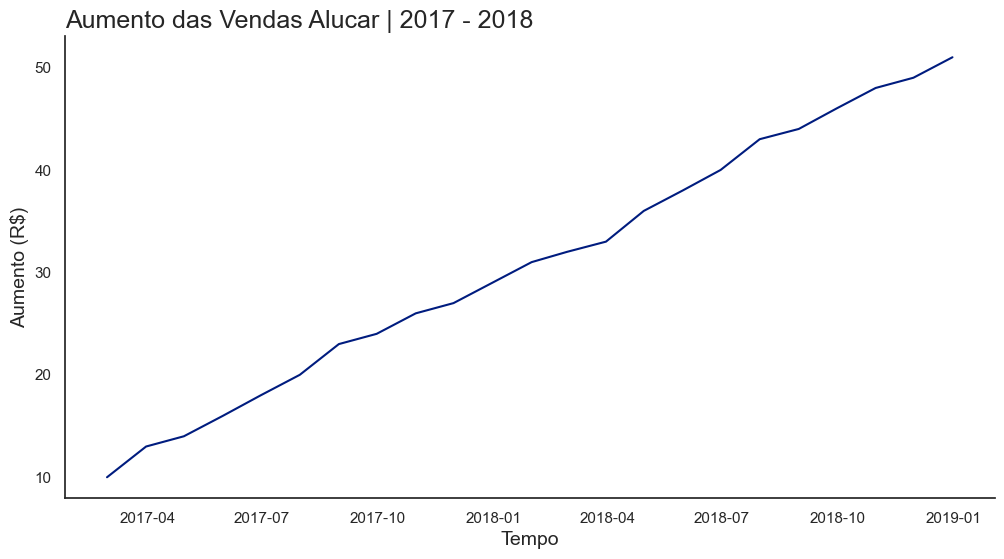

In [38]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas Alucar | 2017 - 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento (R$)', fontsize=14)
ax=ax

In [39]:
alucar['acc'] = alucar.aumento.diff()

In [40]:
alucar.head()

,mes,vendas,aumento,acc
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


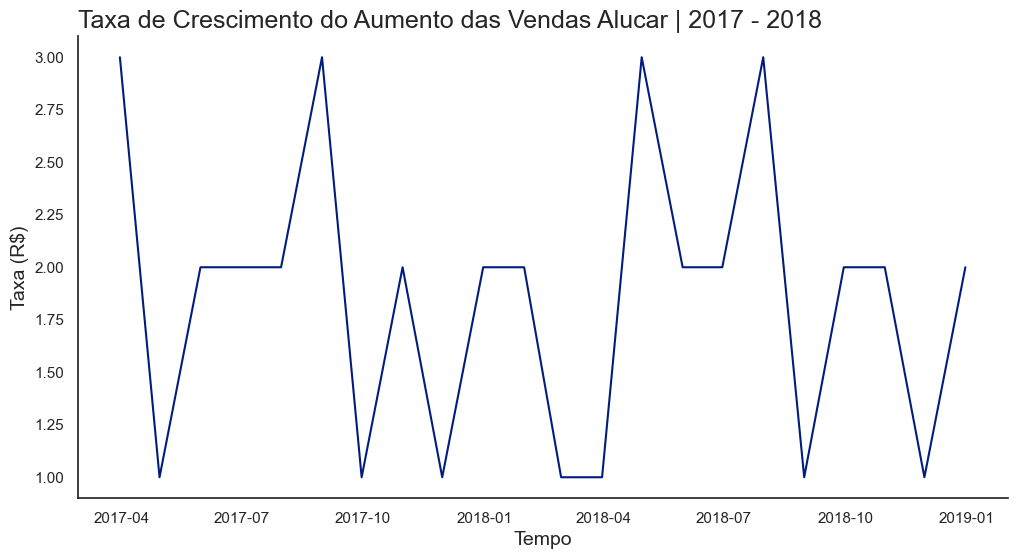

In [41]:
ax = sns.lineplot(x='mes', y='acc', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Taxa de Crescimento do Aumento das Vendas Alucar | 2017 - 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Taxa (R$)', fontsize=14)
ax=ax

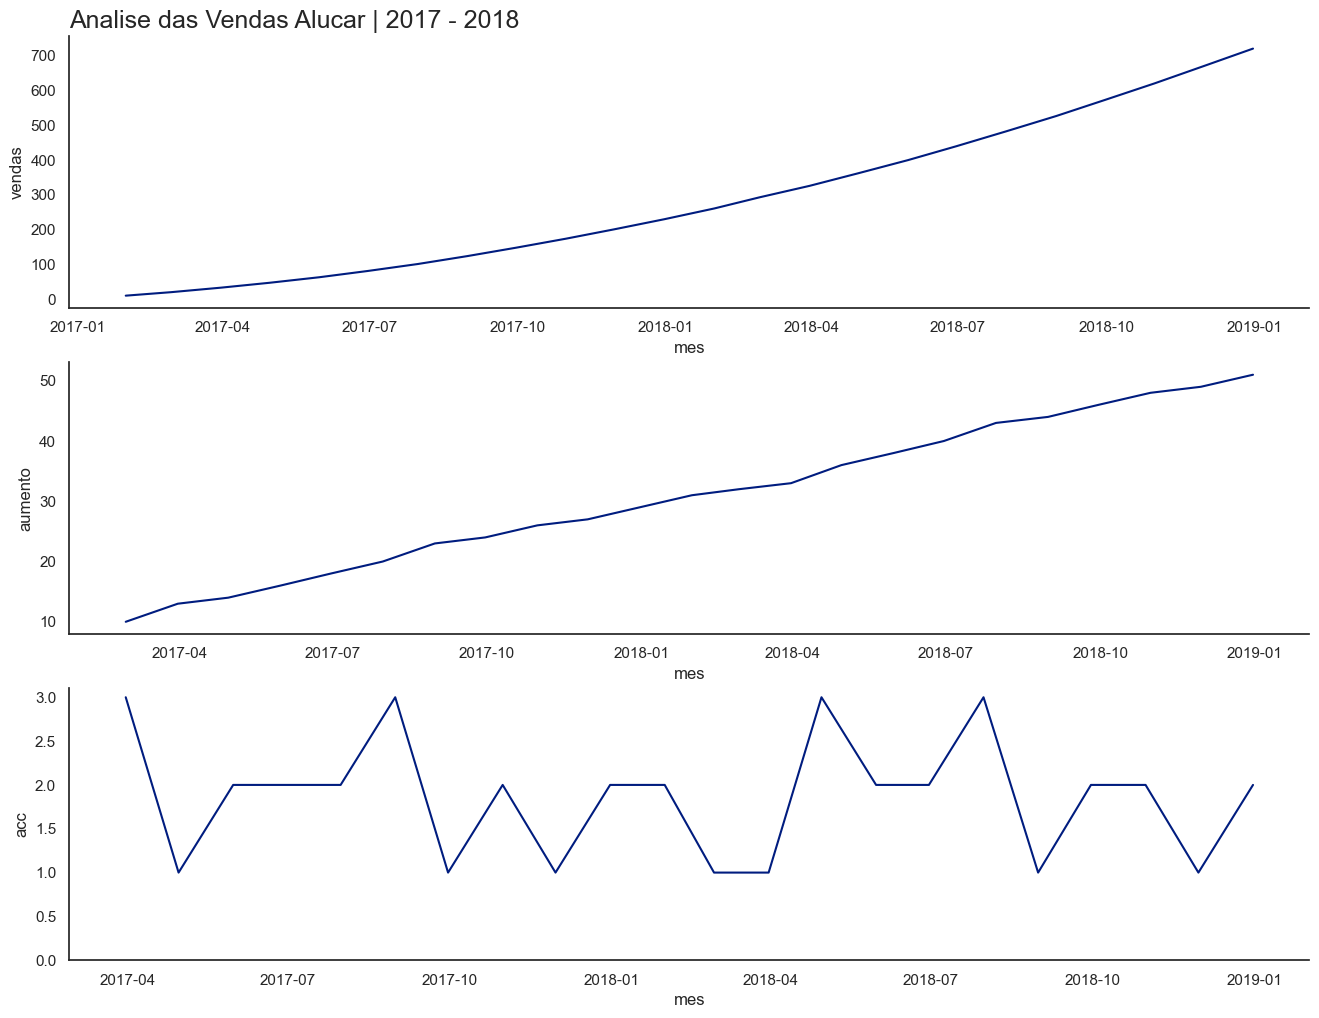

In [48]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise das Vendas Alucar | 2017 - 2018', loc='left', fontsize=18)
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='acc', data=alucar)
ax = plt.ylim(0)

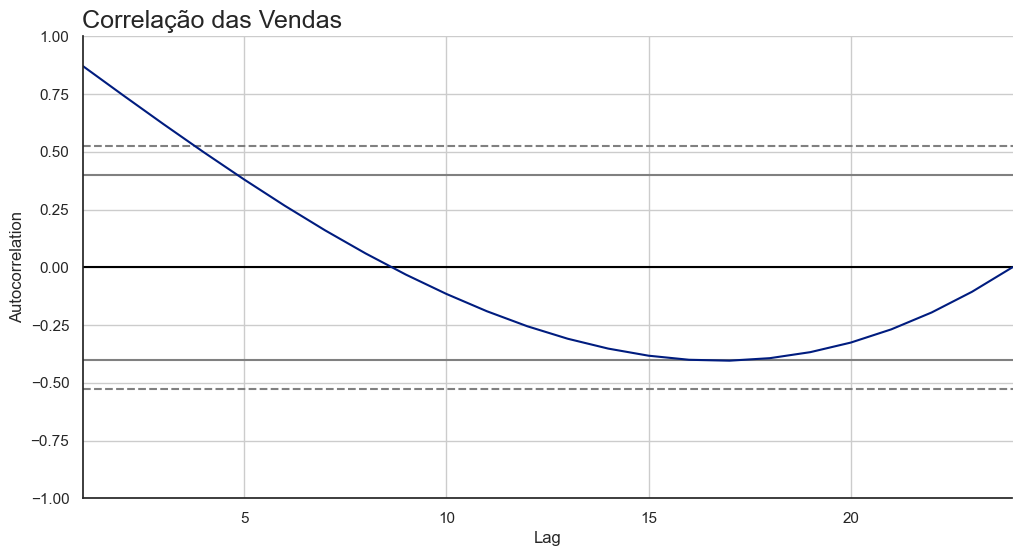

In [53]:
ax = autocorrelation_plot(alucar.vendas)
ax.set_title('Correlação das Vendas', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

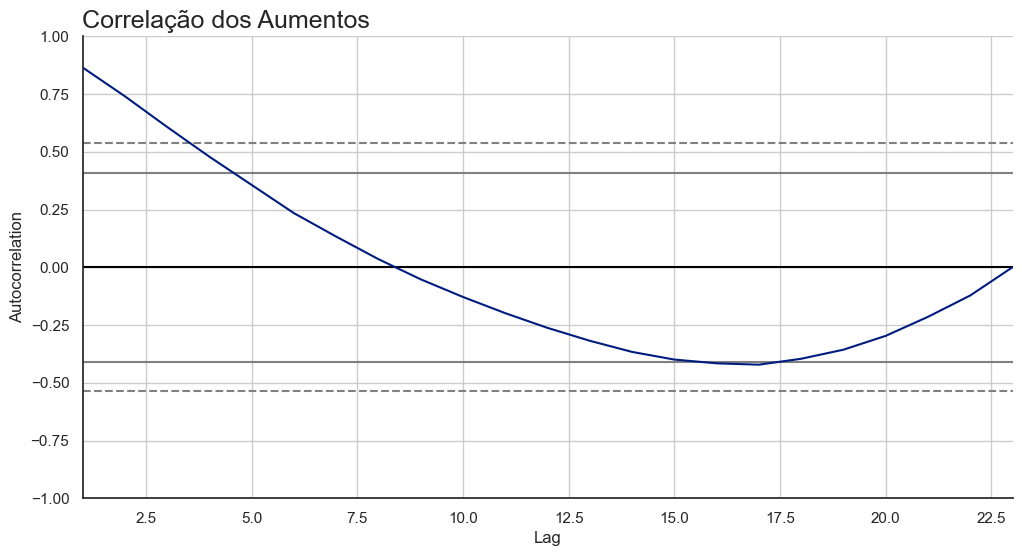

In [54]:
ax = autocorrelation_plot(alucar.aumento[1:])
ax.set_title('Correlação dos Aumentos', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

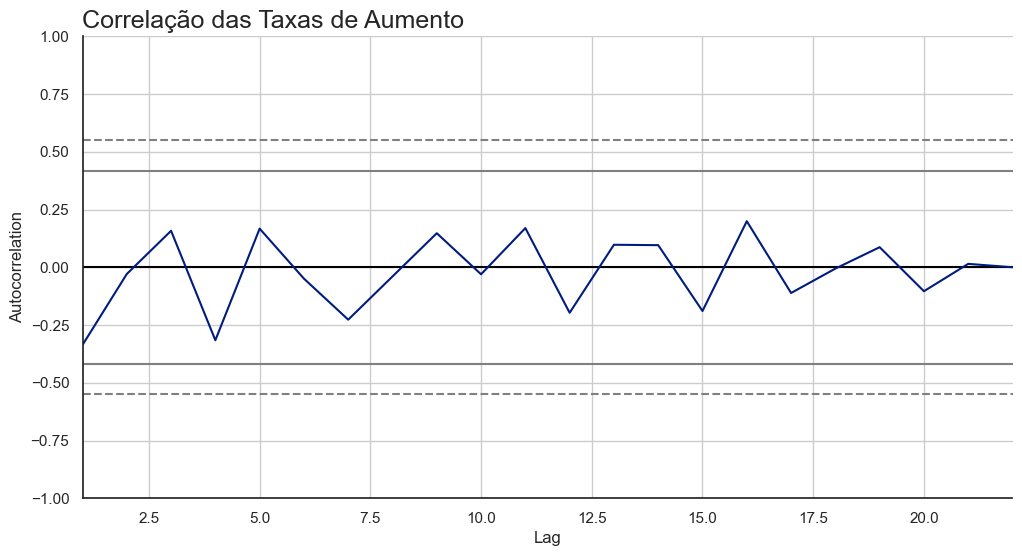

In [55]:
ax = autocorrelation_plot(alucar.acc[2:])
ax.set_title('Correlação das Taxas de Aumento', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

In [56]:
alucar.head()

,mes,vendas,aumento,acc
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
